In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")
#corpus[0]

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1
len(tokenizer.word_index)
print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
labels

array([  2,  66,   8,  67,  68,  69,  70,  40,  20,  21,  72,   3,  73,
        74,  75,   1,  76,  33,   3,  77,  22,  33,   3,  78,   1,  79,
        80,   8,  81,  82,   3,  83,  84,   7,  42,   1,  43,  86,  87,
        33,  44,  88,  13,   2,  45,  89,  90,  91,  92,  93,  94,  95,
        96,  97,   2,  98,   1,   2,  99,   8,   9,  10,  13, 100, 101,
        23, 102, 103,   5,   2,  47,  17,   1,  24,   6, 104, 105,  48,
         4,   3, 106, 107,  42,   1,  43,  49,  25,  50,  18, 108,  25,
         3, 109, 111,  26,  47, 112, 113,  51,  52,   3, 114,   7,  13,
       115,  27,   3, 116,   6,  53, 117, 118, 119, 120,   4,  54,   7,
         9,  10,  11, 121,   8, 122,   1, 123,   7,   2, 124,   1, 126,
        28,  34, 127,   1, 128,  11,   2, 129, 130, 131,   2,  17,   1,
        49,  40,  19, 134,  25,  18, 135,  18, 136, 137,  26, 138, 139,
         4, 140,  55, 141, 143, 144,   1,   2, 145, 146, 147, 148, 149,
        12,   9,  10,  11, 150,   5, 151,   8, 152, 153,  25,   

In [12]:
max_sequence_len

11

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [6]:

print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [8]:
print(xs[5])


[ 0  0  0  0  4  2 66  8 67 68]


In [9]:
print(ys[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 7s 13ms/step - loss: 5.5696 - accuracy: 0.0357
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5457 - accuracy: 0.0399
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4822 - accuracy: 0.0565
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 5.2959 - accuracy: 0.0509
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0901 - accuracy: 0.0596
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0097 - accuracy: 0.0660
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0097 - accuracy: 0.0615
Epoch 8/500
15/15 [==============================] - 0s 12ms/step - loss: 5.0699 - accuracy: 0.0429
Epoch 9/500
15/15 [==============================] - 0s 12ms/step - loss: 4.9981 - accuracy: 0.0510
Epoch 10/500
15/15 [==============================] - 0s 11ms/step - loss: 4.8823 - accuracy: 0.0655
Epoch

15/15 [==============================] - 0s 13ms/step - loss: 2.3498 - accuracy: 0.5819
Epoch 83/500
15/15 [==============================] - 0s 14ms/step - loss: 2.1617 - accuracy: 0.6328
Epoch 84/500
15/15 [==============================] - 0s 12ms/step - loss: 2.2680 - accuracy: 0.6088
Epoch 85/500
15/15 [==============================] - 0s 11ms/step - loss: 2.3144 - accuracy: 0.5815
Epoch 86/500
15/15 [==============================] - 0s 11ms/step - loss: 2.2100 - accuracy: 0.6008
Epoch 87/500
15/15 [==============================] - 0s 13ms/step - loss: 2.2385 - accuracy: 0.6101
Epoch 88/500
15/15 [==============================] - 0s 13ms/step - loss: 2.1923 - accuracy: 0.6217
Epoch 89/500
15/15 [==============================] - 0s 12ms/step - loss: 2.1725 - accuracy: 0.6097
Epoch 90/500
15/15 [==============================] - 0s 11ms/step - loss: 2.1329 - accuracy: 0.6063
Epoch 91/500
15/15 [==============================] - 0s 12ms/step - loss: 2.1470 - accuracy: 0.6023
Epo

15/15 [==============================] - 0s 13ms/step - loss: 0.9671 - accuracy: 0.8933
Epoch 162/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9688 - accuracy: 0.8729
Epoch 163/500
15/15 [==============================] - 0s 13ms/step - loss: 0.9031 - accuracy: 0.9124
Epoch 164/500
15/15 [==============================] - 0s 14ms/step - loss: 0.9553 - accuracy: 0.8937
Epoch 165/500
15/15 [==============================] - 0s 14ms/step - loss: 0.9105 - accuracy: 0.9106
Epoch 166/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9227 - accuracy: 0.8968
Epoch 167/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9344 - accuracy: 0.8961
Epoch 168/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9352 - accuracy: 0.8881
Epoch 169/500
15/15 [==============================] - 0s 11ms/step - loss: 0.8838 - accuracy: 0.9010
Epoch 170/500
15/15 [==============================] - 0s 12ms/step - loss: 0.8366 - accuracy: 0

15/15 [==============================] - 0s 11ms/step - loss: 0.4859 - accuracy: 0.9393
Epoch 242/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4446 - accuracy: 0.9497
Epoch 243/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4665 - accuracy: 0.9503
Epoch 244/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4423 - accuracy: 0.9462
Epoch 245/500
15/15 [==============================] - 0s 12ms/step - loss: 0.4572 - accuracy: 0.9387
Epoch 246/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4546 - accuracy: 0.9359
Epoch 247/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4968 - accuracy: 0.9078
Epoch 248/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4757 - accuracy: 0.9365
Epoch 249/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4415 - accuracy: 0.9450
Epoch 250/500
15/15 [==============================] - 0s 11ms/step - loss: 0.4531 - accuracy: 0

15/15 [==============================] - 0s 9ms/step - loss: 0.2751 - accuracy: 0.9479
Epoch 322/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2703 - accuracy: 0.9485
Epoch 323/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2622 - accuracy: 0.9529
Epoch 324/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2555 - accuracy: 0.9456
Epoch 325/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2628 - accuracy: 0.9590
Epoch 326/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2792 - accuracy: 0.9468
Epoch 327/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2501 - accuracy: 0.9591
Epoch 328/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2572 - accuracy: 0.9612
Epoch 329/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2623 - accuracy: 0.9383
Epoch 330/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2660 - accuracy: 0.9469


15/15 [==============================] - 0s 12ms/step - loss: 0.1955 - accuracy: 0.9389
Epoch 402/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2029 - accuracy: 0.9468
Epoch 403/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1977 - accuracy: 0.9485
Epoch 404/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1961 - accuracy: 0.9442
Epoch 405/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1597 - accuracy: 0.9634
Epoch 406/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1849 - accuracy: 0.9491
Epoch 407/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1709 - accuracy: 0.9586
Epoch 408/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1877 - accuracy: 0.9568
Epoch 409/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1879 - accuracy: 0.9463
Epoch 410/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1681 - accuracy: 0.961

Epoch 482/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1525 - accuracy: 0.9473
Epoch 483/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2282 - accuracy: 0.9290
Epoch 484/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2268 - accuracy: 0.9202
Epoch 485/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2137 - accuracy: 0.9453
Epoch 486/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1874 - accuracy: 0.9437
Epoch 487/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2166 - accuracy: 0.9299
Epoch 488/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1857 - accuracy: 0.9453
Epoch 489/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2369 - accuracy: 0.9318
Epoch 490/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1612 - accuracy: 0.9509
Epoch 491/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1848

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

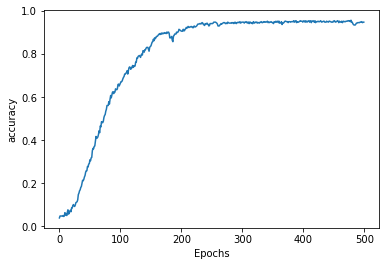

In [14]:
plot_graphs(history, 'accuracy')

In [15]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin the row miss kerrigan fainted up wall wall away squeezed away up them by the red as a reel and a jig cask dublin gave took lanigan forget lanigan forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget forget


# Text Generation Using LSTMs, see if you can write Shakespeare!

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [17]:
!pip install wget
import wget

In [19]:
import wget
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt'
myfile = wget.download(url)

100% [..............................................................................] 93578 / 93578

In [20]:
tokenizer = Tokenizer()
data = open('E:\\TensorflowDeveloperCertification\\Learning/sonnets.txt').read()

In [23]:
data

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [21]:
corpus = data.lower().split("\n")

In [22]:
corpus

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery, so gazed on now,",
 "will be a tatter'd weed, of small worth held:",
 "then being ask'd where all thy beauty lies,",
 'where all the treasure of thy lusty days,',
 'to say, within thine own deep-sunken eyes,',

In [24]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [25]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [26]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [27]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [28]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [29]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 84s 151ms/step - loss: 7.3373 - accuracy: 0.0171
Epoch 2/100
484/484 [==============================] - 68s 140ms/step - loss: 6.4708 - accuracy: 0.0218
Epoch 3/100
484/484 [==============================] - 61s 125ms/step - loss: 6.4130 - accuracy: 0.0221
Epoch 4/100
484/484 [==============================] - 67s 137ms/step - loss: 6.2857 - accuracy: 0.0287
Epoch 5/100
484/484 [==============================] - 65s 135ms/step - loss: 6.1543 - accuracy: 0.0392
Epoch 6/100
484/484 [==============================] - 64s 132ms/step - loss: 6.0660 - accuracy: 0.0376
Epoch 7/100
484/484 [==============================] - 64s 131ms/step - loss: 5.9471 - accuracy: 0.0415
Epoch 8/100
484/484 [==============================] - 61s 127ms/step - loss: 5.8687 - accuracy: 0.0444
Epoch 9/100
484/484 [==============================] - 72s 149ms/step - loss: 5.7788 - accuracy: 0.0521
Epoch 10/100
484/484 [==============================] - 61s 126m

484/484 [==============================] - 61s 126ms/step - loss: 1.4037 - accuracy: 0.7535
Epoch 80/100
484/484 [==============================] - 64s 133ms/step - loss: 1.3670 - accuracy: 0.7660
Epoch 81/100
484/484 [==============================] - 60s 125ms/step - loss: 1.3389 - accuracy: 0.7682
Epoch 82/100
484/484 [==============================] - 60s 124ms/step - loss: 1.3193 - accuracy: 0.7752
Epoch 83/100
484/484 [==============================] - 60s 123ms/step - loss: 1.3396 - accuracy: 0.7698
Epoch 84/100
484/484 [==============================] - 60s 123ms/step - loss: 1.3183 - accuracy: 0.7744
Epoch 85/100
484/484 [==============================] - 61s 125ms/step - loss: 1.3253 - accuracy: 0.7688
Epoch 86/100
484/484 [==============================] - 60s 124ms/step - loss: 1.2924 - accuracy: 0.7779
Epoch 87/100
484/484 [==============================] - 57s 119ms/step - loss: 1.3097 - accuracy: 0.7721
Epoch 88/100
484/484 [==============================] - 58s 120ms/st

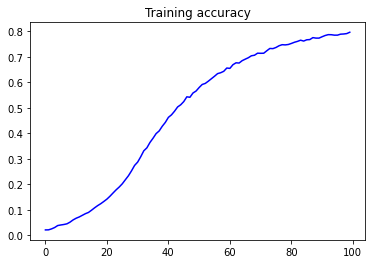

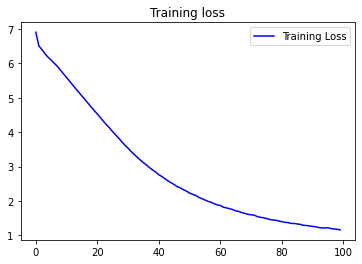

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [31]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope seem birth to me i live be bright still be twain shown shown dearer live bright cross cross strive to lend thee dearer seen give youth eyes hence seen hence rotten asleep forgot bearing bearing rolling rolling twain cured spend twain green me bright ' play me rare stell'd stay shine hence told me back releasing down i wrinkles not none twain slain green thee there bright shine bright shine bright go quite grow new rage wind mother cured cured twain gone used forgot should find bright green rolling rolling green thee so you doth grow wide cheeks grave way


In [32]:
pwd

'E:\\TensorflowDeveloperCertification\\Learning'